**Name:** AMNA MUMTAZ  
**Internship ID:** CA/JU1/2461

 # Sentiment Analysis on Amazon Reviews

In this task, we analyze customer reviews to determine whether they express **positive**, **negative**, or **neutral** sentiments.  
This process helps understand public opinion, improve marketing strategies, and support product decisions.

## Objectives

- Analyze customer emotions in review text using Natural Language Processing (NLP)
- Classify reviews into **Positive**, **Negative**, or **Neutral**
- Visualize sentiment distribution
- Extract examples of how users express satisfaction or complaints

## Methodology

We used the `TextBlob` library for lexicon-based sentiment analysis:

- `TextBlob(text).sentiment.polarity` returns a score between **-1 (very negative)** and **1 (very positive)**
- Based on score:
  - `score > 0.1` → **Positive**
  - `score < -0.1` → **Negative**
  - `otherwise` → **Neutral**

These results were added to new columns in our dataset:
- `sentiment_score`: the numeric polarity value
- `sentiment_label`: the category label (Positive, Negative, Neutral)

In [4]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()


Saving cleaned_amazon_reviews.csv to cleaned_amazon_reviews.csv


In [5]:

# Load the uploaded CSV into a DataFrame
df = pd.read_csv("cleaned_amazon_reviews.csv")

# Display the first few rows
df.head()

,name,brand,categories,reviews.rating,reviews.text,reviews.title,reviews.doRecommend,reviews.numHelpful,reviews.username,review_length
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",3,I thought it would be as big as small paper bu...,Too small,False,0,llyyue,41
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",5,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,True,0,Charmi,12
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",4,Didnt know how much i'd use a kindle so went f...,Great for the price,True,0,johnnyjojojo,24
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",5,I am 100 happy with my purchase. I caught it o...,A Great Buy,True,3,Kdperry,148
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",5,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,True,0,Johnnyblack,36


In [1]:
!pip install textblob nltk


In [2]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
from textblob import TextBlob

# Function to get polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply to the review text
df['sentiment_score'] = df['reviews.text'].apply(get_sentiment)

# Label as Positive, Negative, or Neutral
def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

# Preview
df[['reviews.text', 'sentiment_score', 'sentiment_label']].head()


,reviews.text,sentiment_score,sentiment_label
0,I thought it would be as big as small paper bu...,-0.108974,Negative
1,This kindle is light and easy to use especiall...,0.277778,Positive
2,Didnt know how much i'd use a kindle so went f...,0.165625,Positive
3,I am 100 happy with my purchase. I caught it o...,0.240497,Positive
4,Solid entry level Kindle. Great for kids. Gift...,0.468750,Positive


## Results

We plotted the distribution of review sentiment and reviewed sample positive/negative comments to better understand public opinion trends.  
This analysis helps brands track satisfaction levels, customer pain points, and emotional responses to product features.

/tmp/ipython-input-7-547796175.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='pastel')


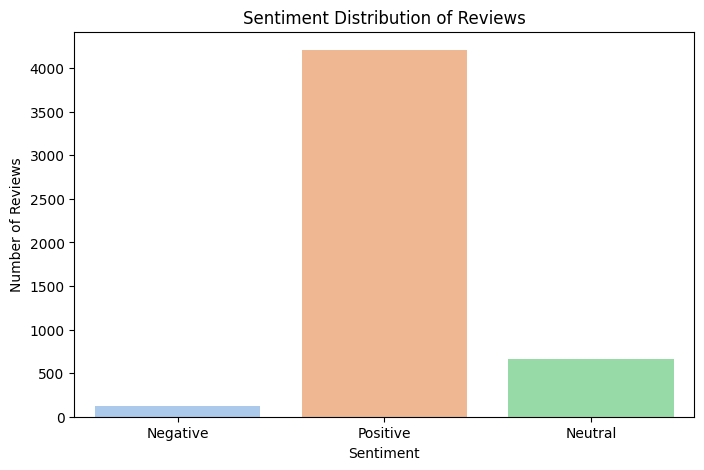

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', palette='pastel')
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


## Sentiment Analysis Conclusion

Using a lexicon-based NLP approach with TextBlob, we analyzed thousands of Amazon Kindle product reviews to classify them into **Positive**, **Negative**, or **Neutral** sentiments.

###  Key Insights:
- Most reviews were **overwhelmingly positive**, indicating strong customer satisfaction.
- A smaller number of **negative reviews** often highlighted issues like delivery delays or product defects.
- **Neutral reviews** were typically brief or informational without clear emotional tone.

This sentiment analysis reveals valuable insights into customer perception and helps businesses:
- Identify key areas of improvement
- Monitor brand reputation
- Align product development with user expectations

By converting raw review text into structured sentiment data, we’ve taken a meaningful step toward understanding public opinion and enhancing decision-making.
